# Day 08. Exercise 00
# Binary classifier. Logistic regression

## 0. Imports

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 1. Preprocessing

- Get the data from the file [`checker-timestamp.csv`](https://drive.google.com/file/d/1pooM4cITtG249msX3GK_6W0eEiblzAf5/view?usp=sharing).


- Create a dataframe `df` with the columns: `date`, `am`, `pm`, `target`, where `date` is the date of the day, `am` is the number of the commits during the day before midday (integer), `pm` is the number of commits during the day after midday (integer), `target` is weekend/working_day.

In [37]:
df = pd.read_csv('../data/checker_timestamp.csv', parse_dates=['timestamp'])


In [38]:
df['date'] = df['timestamp'].dt.date
df['am'] = (df['timestamp'].dt.hour).apply(lambda x: 1 if x < 12 else 0)
df['pm'] = (df['timestamp'].dt.hour).apply(lambda x: 0 if x < 12 else 1)
df['target'] = (df['timestamp'].dt.day_of_week).apply(lambda x: 'weekend' if x >= 5 else 'working_day')
df

,timestamp,date,am,pm,target
0,2020-04-17 05:19:02.744528,2020-04-17,1,0,working_day
1,2020-04-17 05:22:35.249331,2020-04-17,1,0,working_day
2,2020-04-17 05:22:45.549397,2020-04-17,1,0,working_day
3,2020-04-17 05:34:14.691200,2020-04-17,1,0,working_day
4,2020-04-17 05:34:24.422370,2020-04-17,1,0,working_day
...,...,...,...,...,...
3202,2020-05-21 20:19:06.872761,2020-05-21,0,1,working_day
3203,2020-05-21 20:22:41.785725,2020-05-21,0,1,working_day
3204,2020-05-21 20:22:41.877806,2020-05-21,0,1,working_day
3205,2020-05-21 20:37:00.129678,2020-05-21,0,1,working_day


## 2. Exploratory analysis

- Create a plot where `x` is am, `y` is pm, each dot is a day, working days and weekends must have different colors.


- By looking at the graph do you think it will be easy to classify the days having those two features? Put your answer in the markdown cell in the end of that sectioin: "yes, it is easy" or "no, it is not easy".

In [39]:
df = df.groupby(by='date').agg({'am':sum, 'pm':sum, 'target':'first'})
df

/tmp/ipykernel_76104/2415340672.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = df.groupby(by='date').agg({'am':sum, 'pm':sum, 'target':'first'})
/tmp/ipykernel_76104/2415340672.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = df.groupby(by='date').agg({'am':sum, 'pm':sum, 'target':'first'})


,am,pm,target
date,,,
2020-04-17,21,2,working_day
2020-04-18,1,68,weekend
2020-04-19,18,15,weekend
2020-04-20,2,23,working_day
2020-04-21,0,25,working_day
2020-04-22,0,28,working_day
2020-04-23,10,33,working_day
2020-04-24,2,14,working_day
2020-04-25,30,74,weekend


Text(0, 0.5, 'pm')

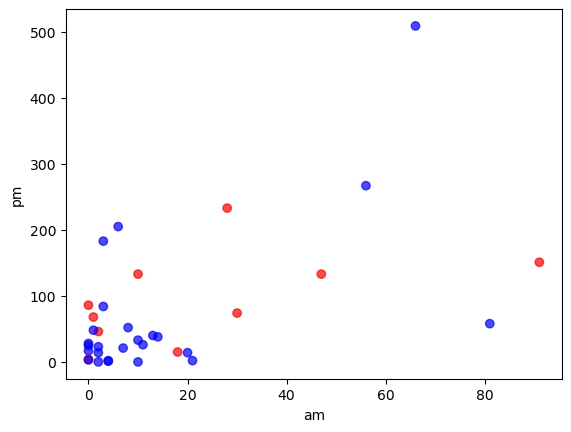

In [40]:
plot = plt.scatter(x = df['am'], y = df['pm'], color=['blue' if i == 'working_day' else 'red' for i in df['target']], alpha=0.7)
plt.xlabel('am')
plt.ylabel('pm')

In [41]:
# sns.set(rc={'figure.figsize':(11,8)})
# sns.scatterplot(x='am', y='pm',  data=df, hue = 'class')

Классифицировать дни по этим двум признакам будет довольно сложно, как видно из графика

## 3. Logistic regression

- Train logistic regression on your data using `am` and `pm`, parameters are: `random state=21`, `fit_intercept=False`.


- Make predictions for every day of your dataset and add them to your dataframe with the column name `predict`.


- Save the dataframe into a file in the subfolder of the day `data` with the name `am_pm.csv`.


- Draw another plot like you did before, but the color should be taken from the `predict`.


- By looking at the graph do you think if it made good predictions? Put your answer in the markdown cell in the end of that section: "yes, it is good"; "no, it is not good".

In [42]:
# df['target'].value_counts().plot(kind='bar')

Признаки для анализа - X
Целевой признак (Y)

In [43]:
X = df[['am', 'pm']].values
Y = df['target']

In [44]:
log_reg = LogisticRegression(random_state=21, fit_intercept=False)

In [45]:
log_reg.fit(X=X, y=Y)

LogisticRegression(fit_intercept=False, random_state=21)

In [46]:
predict = log_reg.predict(X)
df['predict'] = predict
df

,am,pm,target,predict
date,,,,
2020-04-17,21,2,working_day,weekend
2020-04-18,1,68,weekend,working_day
2020-04-19,18,15,weekend,working_day
2020-04-20,2,23,working_day,working_day
2020-04-21,0,25,working_day,working_day
2020-04-22,0,28,working_day,working_day
2020-04-23,10,33,working_day,working_day
2020-04-24,2,14,working_day,working_day
2020-04-25,30,74,weekend,working_day


In [47]:
df.to_csv('../data/am_pm.csv')

Text(0.5, 1.0, 'Data')

<Figure size 640x480 with 0 Axes>

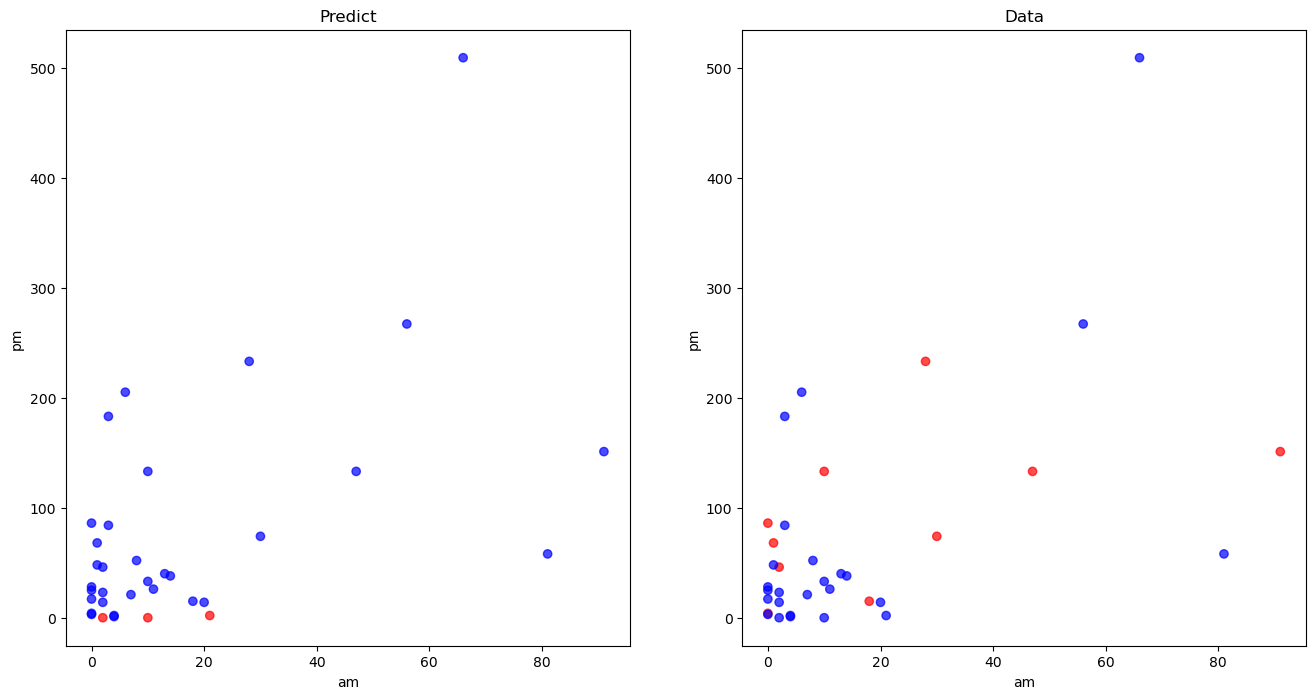

In [48]:
f = plt.figure()   
f, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(16,8))


axes[0].scatter(x = df['am'], y = df['pm'], color=['blue' if i == 'working_day' else 'red' for i in df['predict']], alpha=0.7)
axes[0].set_xlabel('am')
axes[0].set_ylabel('pm')
axes[0].set_title('Predict')

axes[1].scatter(x = df['am'], y = df['pm'], color=['blue' if i == 'working_day' else 'red' for i in df['target']], alpha=0.7)
axes[1].set_xlabel('am')
axes[1].set_ylabel('pm')
axes[1].set_title('Data')

Судя по графикам, предсказание не очень хорошее... (no, it`s not good)

## 4. Evaluation

- Calculate `accuracy` for your predictions.


- Calculate `accuracy` for the naive case when each of your prediction is the value of your most popular class of the day.


- Comparing the accuracies do you think that the classifier made good predictions? Put your answer in the markdown cell in the end of the secion: "yes, it is good"; "no, it is not good".

In [49]:
accuracy_score(Y, predict)

0.6285714285714286

In [50]:
# Найдем accuracy в предположении того, что у нас предсказания предсказывает только один класс
accuracy_score(Y, [df['target'].mode().values] * len(Y))

0.7142857142857143

No, it is no good